In [71]:
#Import external packages
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

from scipy.integrate import odeint as ode
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [2]:
#Import local functions
sys.path.append('../functions')
from functions import dual_control_scipy, loss_biological, upstream_repression_scipy, downstream_activation_scipy

In [3]:
#Establish hyperparameters
alpha1 = 1E-5
alpha2 = 1E-2

int_time = 5E4
t = np.linspace(0, int_time, 100) 
y0 = np.array([2290., 0., 0., 0., 0., 0.]) 

In [9]:
#Wrap the solver in a function to pass to optimizer
def solve_point(x, function=dual_control_scipy):
    n1, n2, theta1, theta2, k1, k2 = x
    pred = ode(function, y0, t, args=(n1, n2, theta1, theta2, k1, k2))
    j1, j2, loss = loss_biological(pred, alpha1=alpha1, alpha2=alpha2)
    losses.append(loss)
    return loss

In [5]:
#Establish bounds on parameters
bounds = Bounds([1, 1, 0.001, 0.001, 1E-7, 1E-7], [4, 4, 100, 100, 0.001, 0.001])

In [35]:
#Create results dataframe
results = pd.DataFrame(columns=['function', 'n1_i', 'n2_i', 'theta1_i', 'theta2_i', 'k1_i', 'k2_i', 
                                'n1_i', 'n2_i', 'theta1_i', 'theta2_i', 'k1_i', 'k2_i', 'n_iters', 'elapsed_time', 'final_loss', 'losses'])

In [36]:
#Perform constrained optimization
function = dual_control_scipy
initial_params = [2, 2, 0.1, 0.1, 0.0001, 0.0001]

losses = []
start_time = time.time()
res = minimize(solve_point, initial_params, args=(function), method='TNC', bounds=bounds, tol=1e-10)
elapsed_time = time.time() - start_time
print('Final Parameter Values: n1=', round(res.x[0],2), 'n2=', round(res.x[1],2), 'theta1=', round(res.x[2],2), 
        'theta2=', round(res.x[3],2), 'k1=', round(res.x[4],5), 'k2=', round(res.x[5],5))
print('Final Loss Value:', losses[-1])
print('Number of Iterations:', res.nfev)
ur_losses = losses

row = [str(function).split(' ')[1], initial_params[0], initial_params[1], initial_params[2], initial_params[3], initial_params[4], initial_params[5],
                        res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.nfev, elapsed_time, losses[-1], losses]
results.loc[len(results)] = row

Final Parameter Values: n1= 1.92 n2= 1.96 theta1= 23.7 theta2= 0.0 k1= 0.00012 k2= 2e-05
Final Loss Value: 0.06988800285914862
Number of Iterations: 231


In [37]:
#Solve UR and DA systems

function = upstream_repression_scipy
initial_params = [2, 2, 0.1, 0.1, 0.0001, 0.0001]

losses = []
start_time = time.time()
res = minimize(solve_point, initial_params, args=(function), method='TNC', bounds=bounds, tol=1e-10)
elapsed_time = time.time() - start_time
print('Final Parameter Values: n1=', round(res.x[0],2), 'n2=', round(res.x[1],2), 'theta1=', round(res.x[2],2), 
        'theta2=', round(res.x[3],2), 'k1=', round(res.x[4],5), 'k2=', round(res.x[5],5))
print('Final Loss Value:', losses[-1])
print('Number of Iterations:', res.nfev)
ur_losses = losses

row = [str(function).split(' ')[1], initial_params[0], initial_params[1], initial_params[2], initial_params[3], initial_params[4], initial_params[5],
                        res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.nfev, elapsed_time, losses[-1], losses]
results.loc[len(results)] = row

function = downstream_activation_scipy
initial_params = [2, 2, 0.1, 0.1, 0.0001, 0.0001]

losses = []
start_time = time.time()
res = minimize(solve_point, initial_params, args=(function), method='TNC', bounds=bounds, tol=1e-10)
elapsed_time = time.time() - start_time
print('Final Parameter Values: n1=', round(res.x[0],2), 'n2=', round(res.x[1],2), 'theta1=', round(res.x[2],2), 
        'theta2=', round(res.x[3],2), 'k1=', round(res.x[4],5), 'k2=', round(res.x[5],5))
print('Final Loss Value:', losses[-1])
print('Number of Iterations:', res.nfev)
ur_losses = losses

row = [str(function).split(' ')[1], initial_params[0], initial_params[1], initial_params[2], initial_params[3], initial_params[4], initial_params[5],
                        res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.nfev, elapsed_time, losses[-1], losses]
results.loc[len(results)] = row

Final Parameter Values: n1= 1.99 n2= 2.0 theta1= 0.62 theta2= 0.1 k1= 7e-05 k2= 0.00041
Final Loss Value: 0.04879013494243534
Number of Iterations: 539


/Users/charlotte/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Final Parameter Values: n1= 2.0 n2= 1.7 theta1= 0.1 theta2= 100.0 k1= 0.00039 k2= 4e-05
Final Loss Value: 0.02484411916004015
Number of Iterations: 483


Text(0, 0.5, 'Loss Value')

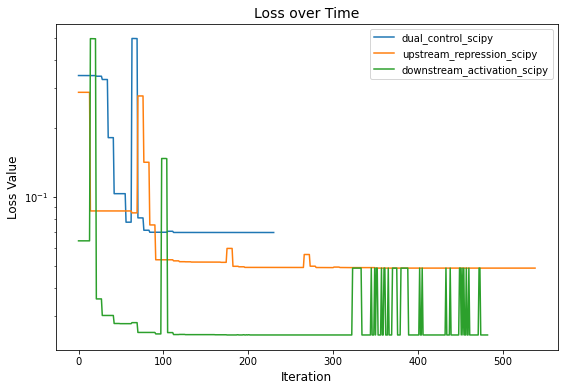

In [41]:
#Plot loss over time
fig, axs = plt.subplots(1, 1, figsize=(9, 6))

endpoint = 'Loss over Time'
ax = axs
for i in range(len(results)):
    ax.plot(results.losses[i], label=results.function[i])

ax.legend()
ax.set_yscale('log')

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Loss Value', fontsize=12)

In [53]:
#Initialization experiments
results = pd.DataFrame(columns=['function', 'n1_i', 'n2_i', 'theta1_i', 'theta2_i', 'k1_i', 'k2_i', 
                                'n1_f', 'n2_f', 'theta1_f', 'theta2_f', 'k1_f', 'k2_f', 'n_iters', 'elapsed_time', 'final_loss', 'losses'])

function = dual_control_scipy
params_list = [[1, 1, 0.001, 0.001, 1E-7, 1E-7], [1, 1, 100, 100, 1E-7, 1E-7],
                [1, 1, 0.001, 0.001,0.001, 0.001], [1, 1, 100, 100, 0.001, 0.001], 
                [4, 4, 0.001, 0.001, 1E-7, 1E-7], [4, 4, 100, 100, 1E-7, 1E-7],
                [4, 4, 0.001, 0.001, 0.001, 0.001], [4, 4, 100, 100, 0.001, 0.001]]

for initial_params in params_list:
    losses = []
    start_time = time.time()
    res = minimize(solve_point, initial_params, args=(function), method='TNC', bounds=bounds, tol=1e-10)
    elapsed_time = time.time() - start_time
    print('Final Parameter Values: n1=', round(res.x[0],2), 'n2=', round(res.x[1],2), 'theta1=', round(res.x[2],2), 
            'theta2=', round(res.x[3],2), 'k1=', round(res.x[4],5), 'k2=', round(res.x[5],5))
    print('Final Loss Value:', losses[-1])
    print('Number of Iterations:', res.nfev)
    ur_losses = losses

    row = [str(function).split(' ')[1], initial_params[0], initial_params[1], initial_params[2], initial_params[3], initial_params[4], initial_params[5],
                            res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.nfev, elapsed_time, losses[-1], losses]
    results.loc[len(results)] = row





/Users/charlotte/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Final Parameter Values: n1= 1.0 n2= 1.0 theta1= 0.98 theta2= 0.0 k1= 0.00067 k2= 3e-05
Final Loss Value: 0.06791473126006864
Number of Iterations: 602
Final Parameter Values: n1= 1.0 n2= 1.0 theta1= 100.0 theta2= 100.0 k1= 6e-05 k2= 0.0001
Final Loss Value: 0.058174632091122364
Number of Iterations: 322
Final Parameter Values: n1= 1.0 n2= 1.06 theta1= 0.12 theta2= 0.5 k1= 0.001 k2= 7e-05
Final Loss Value: 0.0831397608707185
Number of Iterations: 707


/Users/charlotte/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Final Parameter Values: n1= 1.0 n2= 1.0 theta1= 100.0 theta2= 100.0 k1= 0.001 k2= 0.001
Final Loss Value: 0.08313835998942429
Number of Iterations: 56
Final Parameter Values: n1= 4.0 n2= 4.0 theta1= 36.08 theta2= 0.0 k1= 5e-05 k2= 3e-05
Final Loss Value: 0.06630913154799267
Number of Iterations: 385


/Users/charlotte/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Final Parameter Values: n1= 4.0 n2= 4.0 theta1= 100.0 theta2= 100.0 k1= 0.0001 k2= 4e-05
Final Loss Value: 0.06297326359589915
Number of Iterations: 133
Final Parameter Values: n1= 4.0 n2= 4.0 theta1= 0.07 theta2= 0.0 k1= 0.001 k2= 0.001
Final Loss Value: 0.5548054706912838
Number of Iterations: 448


/Users/charlotte/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Final Parameter Values: n1= 4.0 n2= 4.0 theta1= 100.0 theta2= 100.0 k1= 0.001 k2= 0.00021
Final Loss Value: 0.4776957923596301
Number of Iterations: 693


Text(0, 0.5, 'Loss Value')

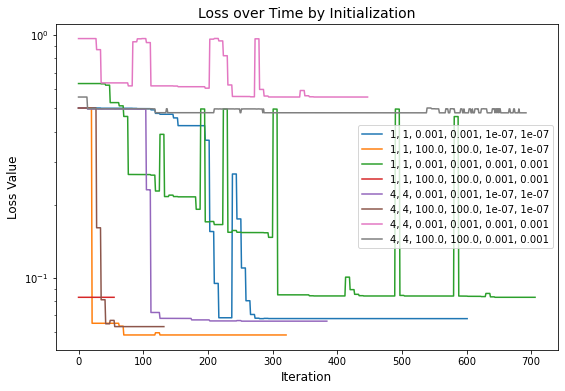

In [64]:
#Plot loss over time
fig, axs = plt.subplots(1, 1, figsize=(9, 6))

endpoint = 'Loss over Time by Initialization'
ax = axs
for i in range(len(results)):
    ax.plot(results.losses[i], label=str([results.iloc[i].n1_i, results.iloc[i].n2_i, results.iloc[i].theta1_i, results.iloc[i].theta2_i, results.iloc[i].k1_i, results.iloc[i].k2_i])[1:-1])

ax.legend()
ax.set_yscale('log')

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Loss Value', fontsize=12)

In [68]:
function = dual_control_scipy
initial_params = [2, 2, 0.1, 0.1, 0.0001, 0.0001]

losses = []
start_time = time.time()
res = minimize(solve_point, initial_params, args=(function), method='TNC', bounds=bounds, tol=1e-10)
elapsed_time = time.time() - start_time
print('Final Parameter Values: n1=', round(res.x[0],2), 'n2=', round(res.x[1],2), 'theta1=', round(res.x[2],2), 
        'theta2=', round(res.x[3],2), 'k1=', round(res.x[4],5), 'k2=', round(res.x[5],5))
print('Final Loss Value:', losses[-1])
print('Number of Iterations:', res.nfev)
ur_losses = losses

row = [str(function).split(' ')[1], initial_params[0], initial_params[1], initial_params[2], initial_params[3], initial_params[4], initial_params[5],
                        res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.nfev, elapsed_time, losses[-1], losses]
results.loc[len(results)] = row


Final Parameter Values: n1= 1.92 n2= 1.96 theta1= 23.7 theta2= 0.0 k1= 0.00012 k2= 2e-05
Final Loss Value: 0.06988800285914862
Number of Iterations: 231


In [69]:
#Compare final values for low loss ones

,function,n1_i,n2_i,theta1_i,theta2_i,k1_i,k2_i,n1_f,n2_f,theta1_f,theta2_f,k1_f,k2_f,n_iters,elapsed_time,final_loss,losses
0,dual_control_scipy,1,1,0.001,0.001,1.000000e-07,1.000000e-07,1.000000,1.000000,0.984540,0.001000,0.000665,0.000026,602,6.460731,0.067915,"[0.5000003482288029, 0.5000003482298485, 0.500..."
1,dual_control_scipy,1,1,100.000,100.000,1.000000e-07,1.000000e-07,1.000000,1.000000,100.000000,99.999353,0.000060,0.000099,322,4.549214,0.058175,"[0.4994652324969303, 0.49946523249564956, 0.49..."
2,dual_control_scipy,1,1,0.001,0.001,1.000000e-03,1.000000e-03,1.000273,1.059033,0.117996,0.495189,0.001000,0.000070,707,8.781655,0.083140,"[0.6304566807848144, 0.6304566843635948, 0.630..."
3,dual_control_scipy,1,1,100.000,100.000,1.000000e-03,1.000000e-03,1.000000,1.000000,100.000000,100.000000,0.001000,0.001000,56,0.692106,0.083138,"[0.0831397608707185, 0.08313835998942429, 0.08..."
4,dual_control_scipy,4,4,0.001,0.001,1.000000e-07,1.000000e-07,3.998000,4.000000,36.083438,0.001000,0.000049,0.000031,385,3.398381,0.066309,"[0.5000442343217775, 0.5000442343217607, 0.500..."
5,dual_control_scipy,4,4,100.000,100.000,1.000000e-07,1.000000e-07,4.000000,3.999959,100.000000,99.998456,0.000105,0.000038,133,1.653217,0.062973,"[0.5000249845277642, 0.5000249845277679, 0.500..."
6,dual_control_scipy,4,4,0.001,0.001,1.000000e-03,1.000000e-03,3.999696,3.999373,0.069647,0.001000,0.001000,0.000995,448,6.303051,0.554805,"[0.9655188136899909, 0.9655188136476919, 0.965..."
7,dual_control_scipy,4,4,100.000,100.000,1.000000e-03,1.000000e-03,4.000000,4.000000,100.000000,100.000000,0.000999,0.000214,693,10.661075,0.477696,"[0.5548004916159176, 0.5548054707317406, 0.554..."
8,dual_control_scipy,2,2,0.100,0.100,1.000000e-04,1.000000e-04,1.920970,1.961252,23.700457,0.001000,0.000121,0.000019,231,2.364179,0.069888,"[0.3407824266389322, 0.340782427536826, 0.3407..."
